In [42]:
from sklearn import linear_model
from tqdm import tqdm

In [36]:
import pandas as pd
weights = pd.read_csv("Linear_Regressor/coef3.out", sep=" ", header=None)
weights = weights.drop(columns=[340])

In [37]:
weights

,0,1,2,3,4,5,6,7,8,9,...,330,331,332,333,334,335,336,337,338,339
0,0.013559,-0.021207,0.015397,0.018863,0.000058,-0.010063,-0.015331,0.004912,-0.018486,0.010064,...,-0.001442,-0.056433,-0.079778,-0.016446,-0.019766,-0.055348,-0.082538,-0.058283,-0.065874,-0.046319
1,0.023783,0.058381,0.015902,0.016946,0.045779,0.019018,0.050762,0.049077,0.036356,0.034158,...,0.018806,0.040396,0.044434,0.019644,0.024980,0.035712,0.049582,0.059459,0.060113,0.047411
2,-0.037343,-0.037174,-0.031299,-0.035809,-0.045837,-0.008956,-0.035430,-0.053988,-0.017870,-0.044222,...,-0.017364,0.016037,0.035344,-0.003197,-0.005214,0.019636,0.032956,-0.001176,0.005761,-0.001092


In [38]:
import pandas as pd
from utils import *

test_set = CustomDataset(f'Linear_Model/one__hot_Ntest_data.txt', f'Linear_Model/Ntest_targets.txt')
X = [test_set[i][0] for i in range(5,15)]
y = [test_set[i][1] for i in range(5,15)]
# print(X)
print(y)

[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]]


In [39]:
reg = linear_model.LinearRegression()
reg.fit(X, y)
print(reg.predict([X[0]]))
print(reg.predict([X[1]]))
print(reg.predict([X[2]]))

[[2.22044605e-16 1.00000000e+00 0.00000000e+00]]
[[-8.8817842e-16  1.0000000e+00  0.0000000e+00]]
[[-4.4408921e-16  1.0000000e+00  0.0000000e+00]]


In [40]:
reg.coef_ = weights.values
print(reg.predict([X[0]]))
print(reg.predict([X[1]]))
print(reg.predict([X[2]]))

[[ 0.88728741  1.24620559 -0.133495  ]]
[[ 0.95676241  1.08375159 -0.040513  ]]
[[1.00681141 0.92255859 0.070633  ]]


In [51]:
real_y = []
pred_y = []

for X,y in tqdm(test_set):
    
    p = reg.predict([X])
    real_y.append(y.index(1))
    pred_y.append(p.argmax())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490612/490612 [00:49<00:00, 9880.67it/s]


In [52]:
df = pd.DataFrame({
    "real": real_y,
    "pred": pred_y,
})
df.to_pickle("Linear_Regressor/pred_summary_test.pickle")
df

,real,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
490607,1,0
490608,1,1
490609,1,1
490610,1,1


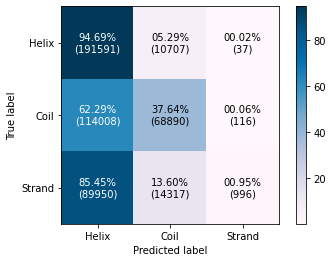

In [53]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df = pd.read_pickle("Linear_Regressor/pred_summary_test.pickle")

M=confusion_matrix(df.real.tolist(), df.pred.tolist())
M_norm = (M.T/M.sum(1)).T*100
heatmap = plt.imshow(M_norm, cmap="PuBu")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0,1,2], ["Helix","Coil","Strand"])
plt.yticks([0,1,2], ["Helix","Coil","Strand"])
for x in range(3):
    for y in range(3):
        
        perc = str(round(M_norm[y,x]/100,4)).ljust(6,'0')[2:]
        perc = perc[:2]+"."+perc[2:]
        
        plt.text(
            x,y,
            f"{perc}%\n({M[y,x]})",
            ha="center",
            va="center",
            c="w" if M_norm[y,x]>50 else "k"
        )
        
plt.colorbar(heatmap)
plt.savefig(f"plots/LinReg.confmat_test.pdf", dpi=300)
plt.show()

In [59]:
(df.real == df.pred).sum() / len(df)

0.5329608733581731

In [68]:
real_y = []
pred_y = []

for X,y in tqdm(test_set):
    
    p = weights.values.dot(np.array(X))
    real_y.append(y.index(1))
    pred_y.append(p.argmax())

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 490612/490612 [00:31<00:00, 15373.52it/s]


In [69]:
df = pd.DataFrame({
    "real": real_y,
    "pred": pred_y,
})
df.to_pickle("Linear_Regressor/dot_pred_summary_test.pickle")
df

,real,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
490607,1,1
490608,1,1
490609,1,1
490610,1,1


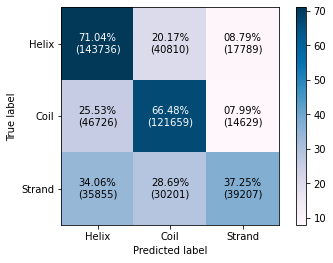

In [70]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df = pd.read_pickle("Linear_Regressor/dot_pred_summary_test.pickle")

M=confusion_matrix(df.real.tolist(), df.pred.tolist())
M_norm = (M.T/M.sum(1)).T*100
heatmap = plt.imshow(M_norm, cmap="PuBu")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0,1,2], ["Helix","Coil","Strand"])
plt.yticks([0,1,2], ["Helix","Coil","Strand"])
for x in range(3):
    for y in range(3):
        
        perc = str(round(M_norm[y,x]/100,4)).ljust(6,'0')[2:]
        perc = perc[:2]+"."+perc[2:]
        
        plt.text(
            x,y,
            f"{perc}%\n({M[y,x]})",
            ha="center",
            va="center",
            c="w" if M_norm[y,x]>50 else "k"
        )
        
plt.colorbar(heatmap)
plt.savefig(f"plots/LinReg_dot.confmat_test.pdf", dpi=300)
plt.show()

In [71]:
(df.real == df.pred).sum() / len(df)

0.6208612916112937

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5672821/5672821 [06:06<00:00, 15467.74it/s]


,real,pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5672816,0,1
5672817,0,1
5672818,1,1
5672819,1,1


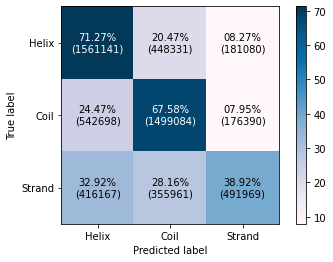

0.6261776988909046

In [72]:
train_set = CustomDataset(f'Linear_Model/one__hot_Ntrain_data.txt', f'Linear_Model/Ntrain_targets.txt')
real_y = []
pred_y = []

for X,y in tqdm(train_set):
    
    p = weights.values.dot(np.array(X))
    real_y.append(y.index(1))
    pred_y.append(p.argmax())
    
df = pd.DataFrame({
    "real": real_y,
    "pred": pred_y,
})
df.to_pickle("Linear_Regressor/dot_pred_summary_train.pickle")
display(df)

import pandas as pd
from sklearn.metrics import confusion_matrix
df = pd.read_pickle("Linear_Regressor/dot_pred_summary_train.pickle")

M=confusion_matrix(df.real.tolist(), df.pred.tolist())
M_norm = (M.T/M.sum(1)).T*100
heatmap = plt.imshow(M_norm, cmap="PuBu")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0,1,2], ["Helix","Coil","Strand"])
plt.yticks([0,1,2], ["Helix","Coil","Strand"])
for x in range(3):
    for y in range(3):
        
        perc = str(round(M_norm[y,x]/100,4)).ljust(6,'0')[2:]
        perc = perc[:2]+"."+perc[2:]
        
        plt.text(
            x,y,
            f"{perc}%\n({M[y,x]})",
            ha="center",
            va="center",
            c="w" if M_norm[y,x]>50 else "k"
        )
        
plt.colorbar(heatmap)
plt.savefig(f"plots/LinReg_dot.confmat_train.pdf", dpi=300)
plt.show()

(df.real == df.pred).sum() / len(df)

In [ ]:
assert False

In [73]:
import pandas as pd

In [77]:
mutual_info = pd.read_csv("Mutual_Information/mutual_information.txt", header=None, sep=" ", index_col=0)
mutual_info.columns = ["i"]
mutual_info.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
i,0.003088,0.004612,0.006659,0.009051,0.009906,0.01169,0.018587,0.032821,0.053692,0.051268,0.027761,0.019363,0.01451,0.010934,0.007526,0.005327,0.003687


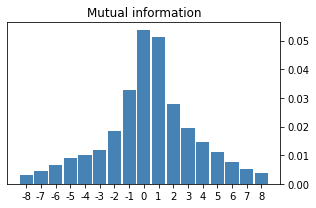

In [78]:
import matplotlib.pyplot as plt

LABELS = ["-"+str(x) for x in range(8,0,-1)]+[str(0)]+[str(x) for x in range(1,9,1)]

fig, ax = plt.subplots(1,1, figsize=(4.5,3), sharey=True, sharex=True)
# ax = axs[2]
ax.yaxis.tick_right()
ax.set_xticks(list(range(17)))
ax.set_xticklabels(LABELS)
ax.yaxis.set_tick_params(labelright=True, labelleft=False)

ax.bar(range(17), mutual_info.i, width=.9, color="steelblue")
ax.set_title("Mutual information")

plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0)
plt.savefig(f"plots/mutual_information.pdf", dpi=300)
plt.show()

In [79]:
weights = pd.read_csv("Linear_Regressor/coef3.out", sep=" ", header=None)
weights = weights.drop(columns=[340])
w0,w1,w2 = weights.values[0], weights.values[1], weights.values[2]

weights.values[0].shape

(340,)

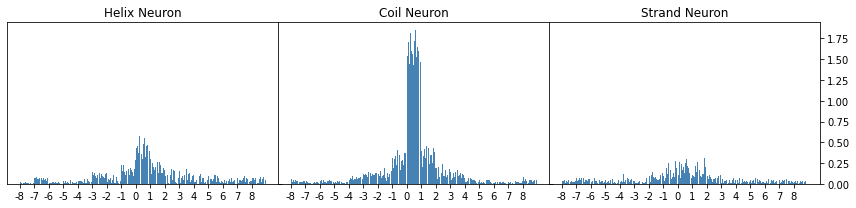

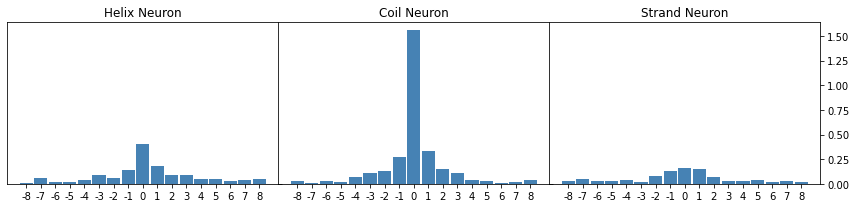

In [80]:
import numpy as np

LABELS = ["-"+str(x) for x in range(8,0,-1)]+[str(0)]+[str(x) for x in range(1,9,1)]
w0,w1,w2 = weights.values[0], weights.values[1], weights.values[2]

def get_sign_color(w0, pos="steelblue", neg="steelblue"):
    return [neg if x<0 else pos for x in w0]


fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)
for i,ax in enumerate(axs):
    ax.yaxis.tick_right()
    ax.set_xticks([x for x in range(17*20) if (x)%20==0])
    ax.set_xticklabels(LABELS)
    # ax.tick_params(axis='x', rotation=90)
    if i == 2:
        ax.yaxis.set_tick_params(labelright=True, labelleft=False)
    else:
        for label in ax.get_yticklabels():
            label.set_visible(False)
axs[0].bar(range(17*20), abs(w0), color=get_sign_color(w0), width=.9)
axs[1].bar(range(17*20), abs(w1), color=get_sign_color(w1), width=.9)
axs[2].bar(range(17*20), abs(w2), color=get_sign_color(w2), width=.9)
axs[0].set_title(f"Helix Neuron")
axs[1].set_title(f"Coil Neuron")
axs[2].set_title(f"Strand Neuron")

plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0)
# plt.savefig(f"LinReg.weights.all.pdf", dpi=300)
plt.show()

avg_w0 = np.reshape(w0, (17,20)).mean(1)
avg_w1 = np.reshape(w1, (17,20)).mean(1)
avg_w2 = np.reshape(w2, (17,20)).mean(1)

abs_avg_w0 = np.reshape(abs(w0), (17,20)).mean(1)
abs_avg_w1 = np.reshape(abs(w1), (17,20)).mean(1)
abs_avg_w2 = np.reshape(abs(w2), (17,20)).mean(1)

fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)
for i,ax in enumerate(axs):
    ax.yaxis.tick_right()
    ax.set_xticks(range(len(abs_avg_w0)))
    ax.set_xticklabels(LABELS)
    if i == 2:
        ax.yaxis.set_tick_params(labelright=True, labelleft=False)
    else:
        for label in ax.get_yticklabels():
            label.set_visible(False)
axs[0].bar(range(17), abs_avg_w0, color=get_sign_color(avg_w0), width=.9)
axs[1].bar(range(17), abs_avg_w1, color=get_sign_color(avg_w1), width=.9)
axs[2].bar(range(17), abs_avg_w2, color=get_sign_color(avg_w2), width=.9)
axs[0].set_title(f"Helix Neuron")
axs[1].set_title(f"Coil Neuron")
axs[2].set_title(f"Strand Neuron")

plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0)
plt.savefig(f"LinReg.weights.avg.pdf", dpi=300)
plt.show()

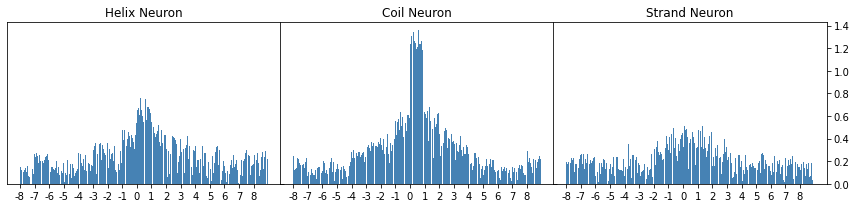

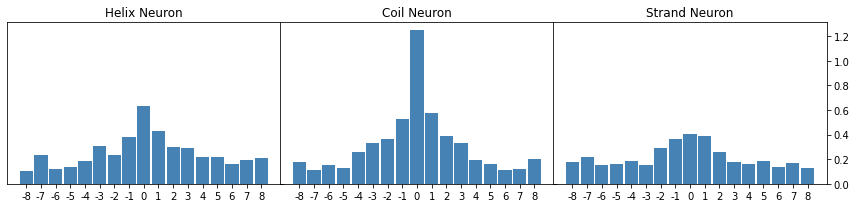

In [114]:
import numpy as np

k=0.5
sharey=True

LABELS = ["-"+str(x) for x in range(8,0,-1)]+[str(0)]+[str(x) for x in range(1,9,1)]
w0,w1,w2 = weights.values[0], weights.values[1], weights.values[2]

def get_sign_color(w0, pos="steelblue", neg="steelblue"):
    return [neg if x<0 else pos for x in w0]


fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=sharey)
for i,ax in enumerate(axs):
    ax.yaxis.tick_right()
    ax.set_xticks([x for x in range(17*20) if (x)%20==0])
    ax.set_xticklabels(LABELS)
    # ax.tick_params(axis='x', rotation=90)
    if i == 2:
        ax.yaxis.set_tick_params(labelright=True, labelleft=False)
    else:
        for label in ax.get_yticklabels():
            label.set_visible(False)
axs[0].bar(range(17*20), abs(w0)**k, color=get_sign_color(w0), width=.9)
axs[1].bar(range(17*20), abs(w1)**k, color=get_sign_color(w1), width=.9)
axs[2].bar(range(17*20), abs(w2)**k, color=get_sign_color(w2), width=.9)
axs[0].set_title(f"Helix Neuron")
axs[1].set_title(f"Coil Neuron")
axs[2].set_title(f"Strand Neuron")

plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0)
# plt.savefig(f"LinReg.weights.all.{k}.pdf", dpi=300)
plt.show()

avg_w0 = np.reshape(w0, (17,20)).mean(1)
avg_w1 = np.reshape(w1, (17,20)).mean(1)
avg_w2 = np.reshape(w2, (17,20)).mean(1)

abs_avg_w0 = np.reshape(abs(w0), (17,20)).mean(1)
abs_avg_w1 = np.reshape(abs(w1), (17,20)).mean(1)
abs_avg_w2 = np.reshape(abs(w2), (17,20)).mean(1)

fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=sharey)
for i,ax in enumerate(axs):
    ax.yaxis.tick_right()
    ax.set_xticks(range(len(abs_avg_w0)))
    ax.set_xticklabels(LABELS)
    if i == 2:
        ax.yaxis.set_tick_params(labelright=True, labelleft=False)
    else:
        for label in ax.get_yticklabels():
            label.set_visible(False)
axs[0].bar(range(17), abs_avg_w0**k, color=get_sign_color(avg_w0), width=.9)
axs[1].bar(range(17), abs_avg_w1**k, color=get_sign_color(avg_w1), width=.9)
axs[2].bar(range(17), abs_avg_w2**k, color=get_sign_color(avg_w2), width=.9)
axs[0].set_title(f"Helix Neuron")
axs[1].set_title(f"Coil Neuron")
axs[2].set_title(f"Strand Neuron")

plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0)
plt.savefig(f"LinReg.weights.avg.{k}.pdf", dpi=300)
plt.show()

In [115]:
k=.5
DATA = (abs_avg_w0 + abs_avg_w1 + abs_avg_w2)/3
DATA = DATA**k


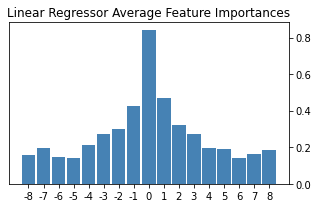

In [118]:
import matplotlib.pyplot as plt



LABELS = ["-"+str(x) for x in range(8,0,-1)]+[str(0)]+[str(x) for x in range(1,9,1)]

fig, ax = plt.subplots(1,1, figsize=(4.5,3), sharey=True, sharex=True)
# ax = axs[2]
ax.yaxis.tick_right()
ax.set_xticks(list(range(17)))
ax.set_xticklabels(LABELS)
ax.yaxis.set_tick_params(labelright=True, labelleft=False)

ax.bar(range(17), DATA, width=.9, color="steelblue")
ax.set_title("Linear Regressor Average Feature Importances")

plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0)
plt.savefig(f"plots/LinReg.weights.overall_avg.{k}.pdf", dpi=300)
plt.show()

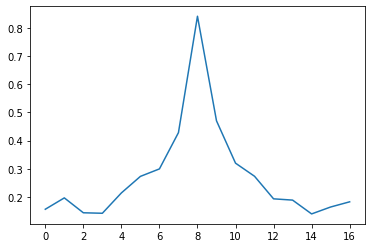

In [119]:
weights = pd.read_csv("Linear_Regressor/coef3.out", sep=" ", header=None)
weights = weights.drop(columns=[340])
w0,w1,w2 = weights.values[0], weights.values[1], weights.values[2]
abs_avg_w0 = np.reshape(abs(w0), (17,20)).mean(1)
abs_avg_w1 = np.reshape(abs(w1), (17,20)).mean(1)
abs_avg_w2 = np.reshape(abs(w2), (17,20)).mean(1)
k=.5
DATA = (abs_avg_w0 + abs_avg_w1 + abs_avg_w2)/3
DATA = DATA**k
plt.plot(DATA)